In [1]:
#!pip3 install albumentations

In [2]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
import albumentations as A
from torchsummary import summary
from src.model import Net
from src.utils import get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class
from src.dataset import dataset_stats,\
                        visualize_images,\
                        visualize_augmentated_images,\
                        AlbumentationImageDataset

CODE BLOCK: 2

In [3]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:src.utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [4]:
sample = datasets.CIFAR10('./data',train=True,download=True)
sample_data = sample.data

mean,std,var = dataset_stats(sample_data)
print(f"SHAPE of Images {sample_data.shape}")
print(f"MEAN of dataset {mean}")
print(f"STD of dataset {std}")
print(f"VAR of dataset {var}")

Files already downloaded and verified
SHAPE of Images (50000, 32, 32, 3)
MEAN of dataset [0.49139968 0.48215841 0.44653091]
STD of dataset [0.24703223 0.24348513 0.26158784]
VAR of dataset [15.56135559 15.11767693 17.44919073]


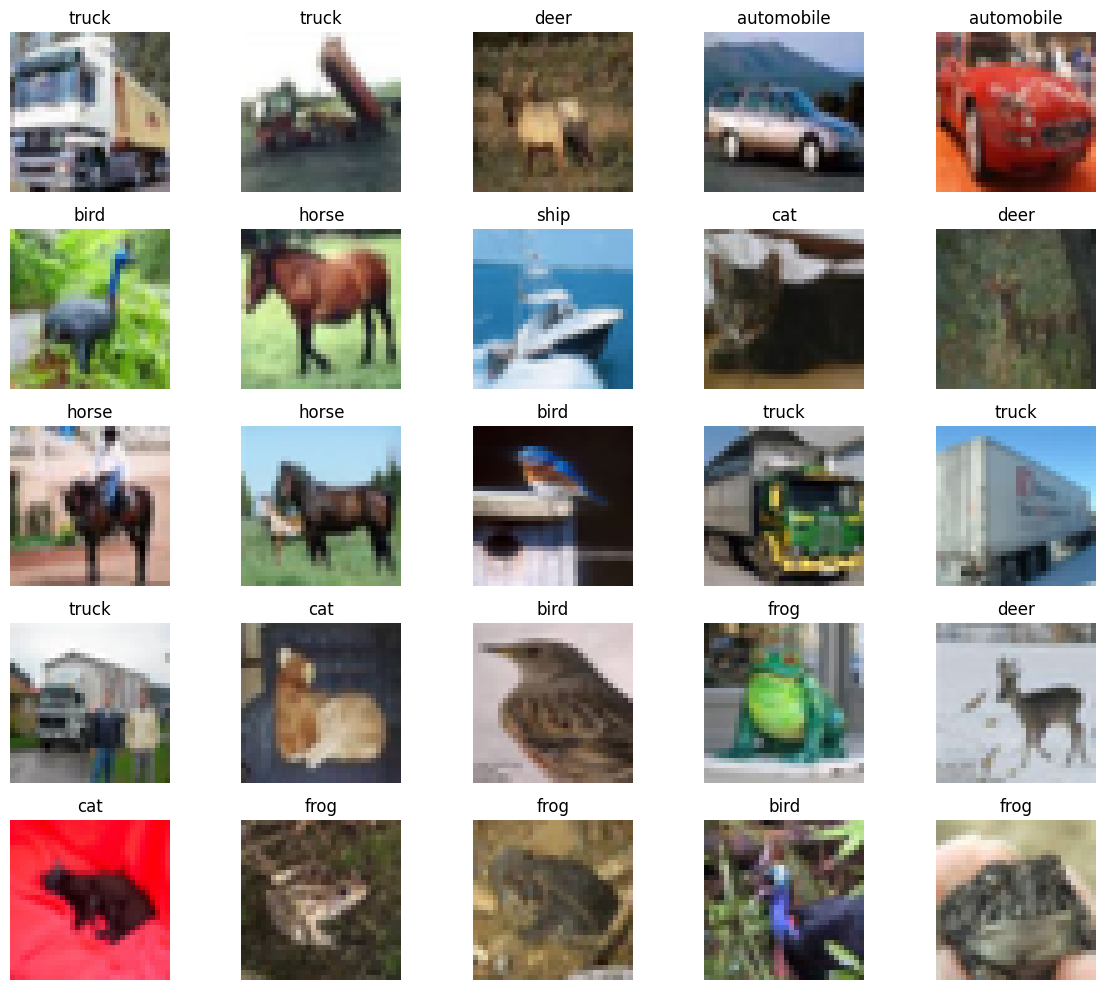

In [5]:
visualize_images(sample,(5,5))

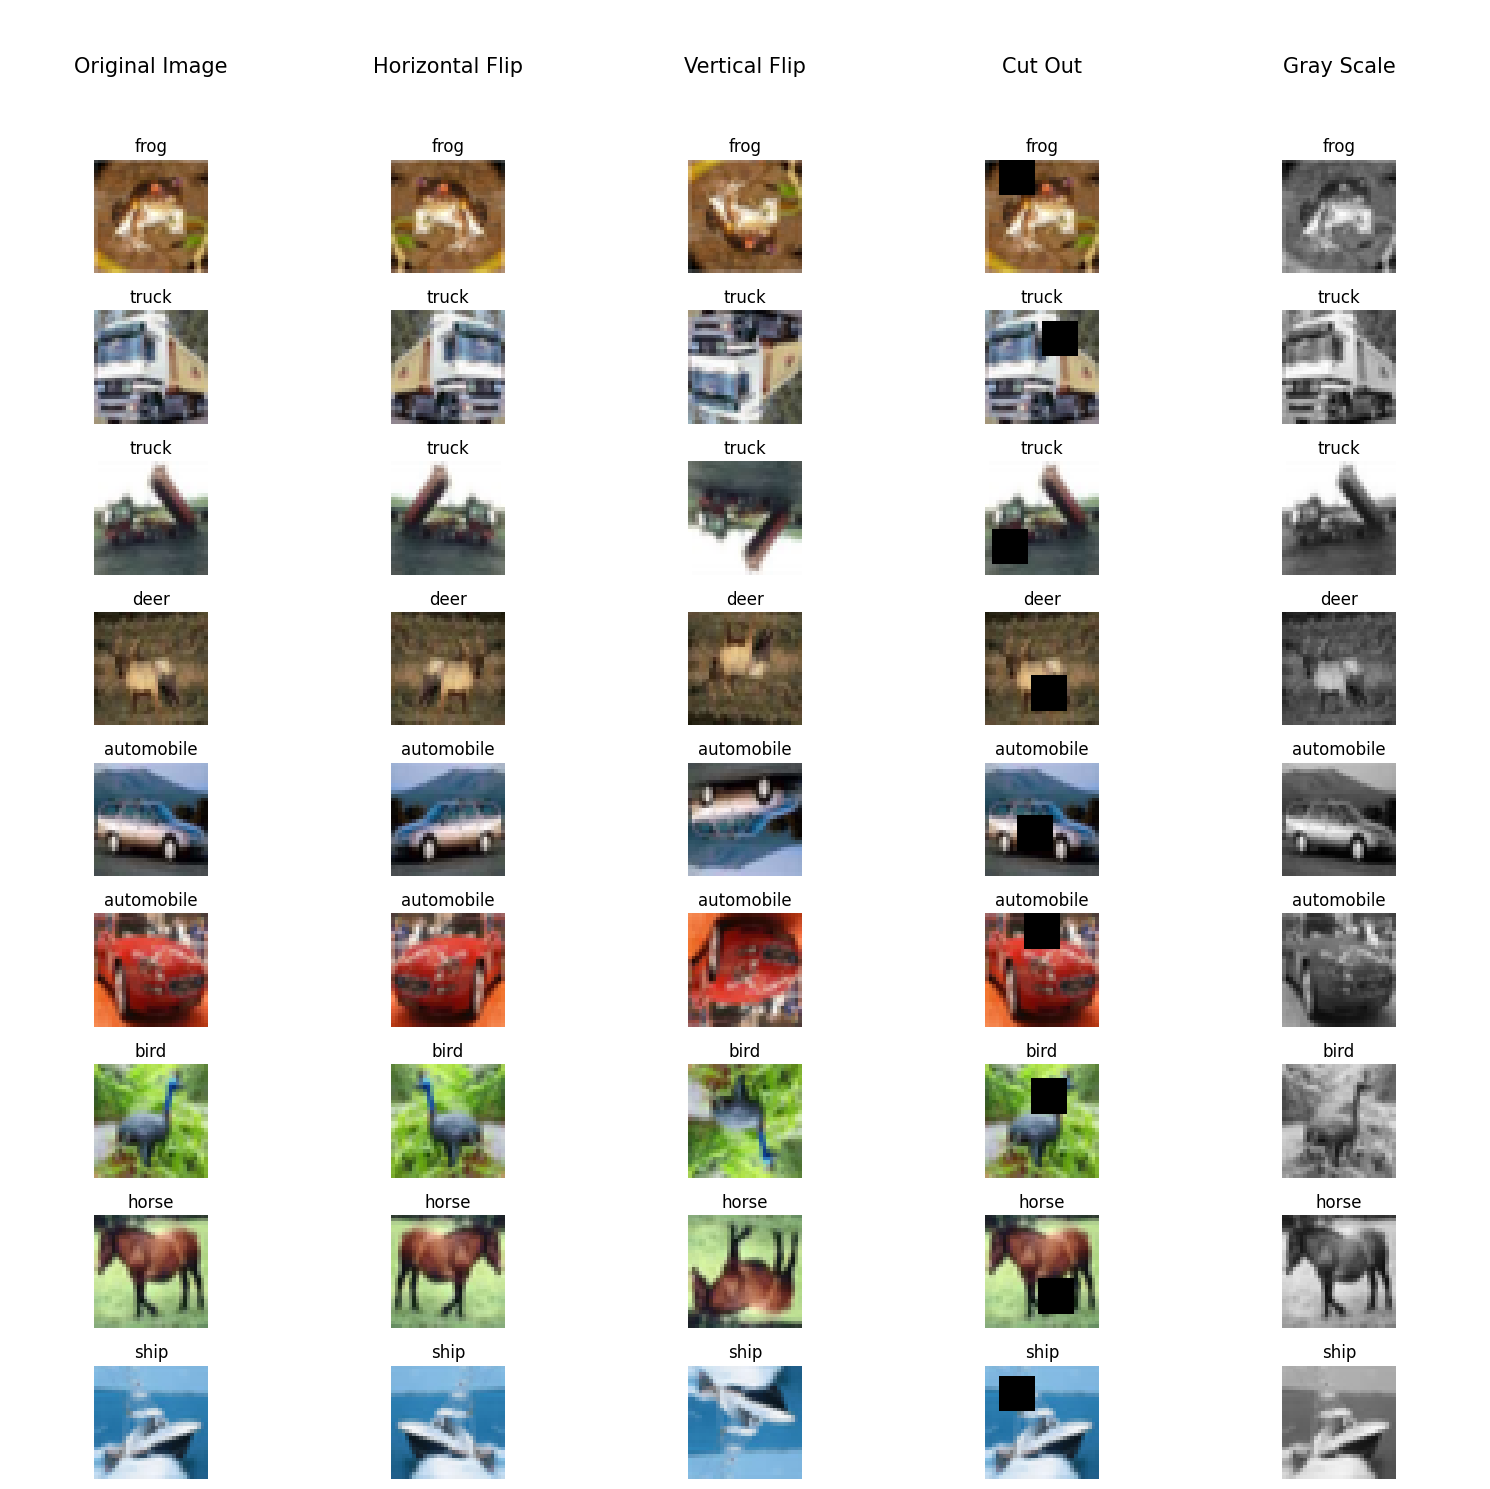

In [6]:
aug_details = {
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=10, max_width=10, min_holes=1, min_height=10,
                               min_width=10, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
}

visualize_augmentated_images(sample,aug_details)

In [7]:
train_data = datasets.CIFAR10(root='./data', train=True,
                                        download=True )
test_data = datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(train_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=True), batch_size=32,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(test_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=False), batch_size=32,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
model = Net(norm_type="ln").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
              ReLU-2           [-1, 10, 32, 32]               0
         GroupNorm-3           [-1, 10, 32, 32]              20
           Dropout-4           [-1, 10, 32, 32]               0
            Conv2d-5           [-1, 20, 32, 32]           1,800
              ReLU-6           [-1, 20, 32, 32]               0
         GroupNorm-7           [-1, 20, 32, 32]              40
           Dropout-8           [-1, 20, 32, 32]               0
            Conv2d-9           [-1, 10, 34, 34]             200
             ReLU-10           [-1, 10, 34, 34]               0
        GroupNorm-11           [-1, 10, 34, 34]              20
          Dropout-12           [-1, 10, 34, 34]               0
        MaxPool2d-13           [-1, 10, 17, 17]               0
           Conv2d-14           [-1, 18,

In [9]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.7,
                       "max_lr":0.015,
                       "num_epochs":20
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 1


Train: Loss=2.0952 Batch_id=1562 Accuracy=28.55: 100%|██████████| 1563/1563 [00:28<00:00, 54.76it/s]


Test set: Average loss: 1.6586, Accuracy: 3982/10000 (39.82%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 2


Train: Loss=1.4344 Batch_id=1562 Accuracy=38.21: 100%|██████████| 1563/1563 [00:29<00:00, 53.05it/s]


Test set: Average loss: 1.4221, Accuracy: 4871/10000 (48.71%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 3


Train: Loss=1.7211 Batch_id=1562 Accuracy=43.05: 100%|██████████| 1563/1563 [00:29<00:00, 53.15it/s]


Test set: Average loss: 1.3218, Accuracy: 5301/10000 (53.01%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 4


Train: Loss=1.2792 Batch_id=1562 Accuracy=46.53: 100%|██████████| 1563/1563 [00:29<00:00, 52.76it/s]


Test set: Average loss: 1.2099, Accuracy: 5691/10000 (56.91%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 5


Train: Loss=1.2352 Batch_id=1562 Accuracy=49.01: 100%|██████████| 1563/1563 [00:28<00:00, 54.01it/s]


Test set: Average loss: 1.1371, Accuracy: 6029/10000 (60.29%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 6


Train: Loss=1.8420 Batch_id=1562 Accuracy=50.98: 100%|██████████| 1563/1563 [00:30<00:00, 50.82it/s]


Test set: Average loss: 1.0977, Accuracy: 6158/10000 (61.58%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 7


Train: Loss=1.3405 Batch_id=1562 Accuracy=52.36: 100%|██████████| 1563/1563 [00:29<00:00, 53.85it/s]


Test set: Average loss: 1.0521, Accuracy: 6293/10000 (62.93%)

Adjusting learning rate of group 0 to 6.0002e-04.
Epoch 8


Train: Loss=1.5655 Batch_id=1562 Accuracy=53.62: 100%|██████████| 1563/1563 [00:29<00:00, 53.81it/s]


Test set: Average loss: 1.0505, Accuracy: 6322/10000 (63.22%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 9


Train: Loss=1.5902 Batch_id=1562 Accuracy=54.55: 100%|██████████| 1563/1563 [00:29<00:00, 53.51it/s]


Test set: Average loss: 1.0557, Accuracy: 6338/10000 (63.38%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 10


Train: Loss=1.0380 Batch_id=1562 Accuracy=55.78: 100%|██████████| 1563/1563 [00:28<00:00, 54.09it/s]


Test set: Average loss: 1.0261, Accuracy: 6421/10000 (64.21%)

Adjusting learning rate of group 0 to 6.0004e-04.
Epoch 11


Train: Loss=0.8501 Batch_id=1562 Accuracy=56.26: 100%|██████████| 1563/1563 [00:28<00:00, 54.16it/s]


Test set: Average loss: 0.9951, Accuracy: 6608/10000 (66.08%)

Adjusting learning rate of group 0 to 6.0005e-04.
Epoch 12


Train: Loss=1.4579 Batch_id=1562 Accuracy=56.83: 100%|██████████| 1563/1563 [00:28<00:00, 54.64it/s]


Test set: Average loss: 0.9699, Accuracy: 6568/10000 (65.68%)

Adjusting learning rate of group 0 to 6.0006e-04.
Epoch 13


Train: Loss=0.7693 Batch_id=1562 Accuracy=57.53: 100%|██████████| 1563/1563 [00:29<00:00, 52.82it/s]


Test set: Average loss: 0.9534, Accuracy: 6675/10000 (66.75%)

Adjusting learning rate of group 0 to 6.0007e-04.
Epoch 14


Train: Loss=1.1598 Batch_id=1562 Accuracy=57.80: 100%|██████████| 1563/1563 [00:28<00:00, 54.26it/s]


Test set: Average loss: 0.9266, Accuracy: 6828/10000 (68.28%)

Adjusting learning rate of group 0 to 6.0008e-04.
Epoch 15


Train: Loss=1.2637 Batch_id=1562 Accuracy=58.56: 100%|██████████| 1563/1563 [00:29<00:00, 53.18it/s]


Test set: Average loss: 0.9289, Accuracy: 6816/10000 (68.16%)

Adjusting learning rate of group 0 to 6.0009e-04.
Epoch 16


Train: Loss=0.8358 Batch_id=1562 Accuracy=58.41: 100%|██████████| 1563/1563 [00:28<00:00, 54.53it/s]


Test set: Average loss: 0.8862, Accuracy: 6969/10000 (69.69%)

Adjusting learning rate of group 0 to 6.0010e-04.
Epoch 17


Train: Loss=0.7120 Batch_id=1562 Accuracy=59.16: 100%|██████████| 1563/1563 [00:29<00:00, 52.74it/s]


Test set: Average loss: 0.8816, Accuracy: 7014/10000 (70.14%)

Adjusting learning rate of group 0 to 6.0012e-04.
Epoch 18


Train: Loss=1.3512 Batch_id=1562 Accuracy=59.47: 100%|██████████| 1563/1563 [00:28<00:00, 54.70it/s]


Test set: Average loss: 0.8717, Accuracy: 7015/10000 (70.15%)

Adjusting learning rate of group 0 to 6.0013e-04.
Epoch 19


Train: Loss=1.4844 Batch_id=1562 Accuracy=59.66: 100%|██████████| 1563/1563 [00:30<00:00, 51.86it/s]


Test set: Average loss: 0.8855, Accuracy: 6961/10000 (69.61%)

Adjusting learning rate of group 0 to 6.0015e-04.
Epoch 20


Train: Loss=1.4493 Batch_id=1562 Accuracy=60.22: 100%|██████████| 1563/1563 [00:28<00:00, 54.21it/s]


Test set: Average loss: 0.8621, Accuracy: 7096/10000 (70.96%)

Adjusting learning rate of group 0 to 6.0016e-04.


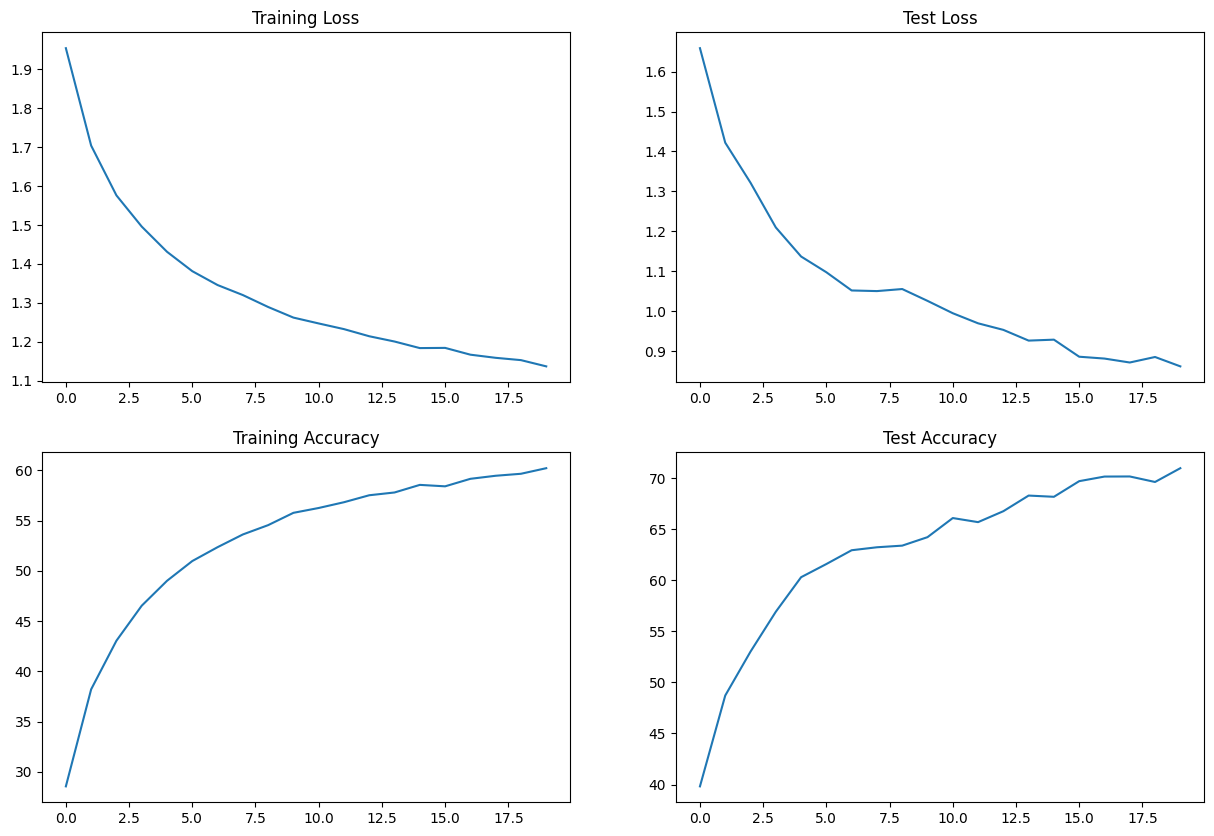

In [10]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

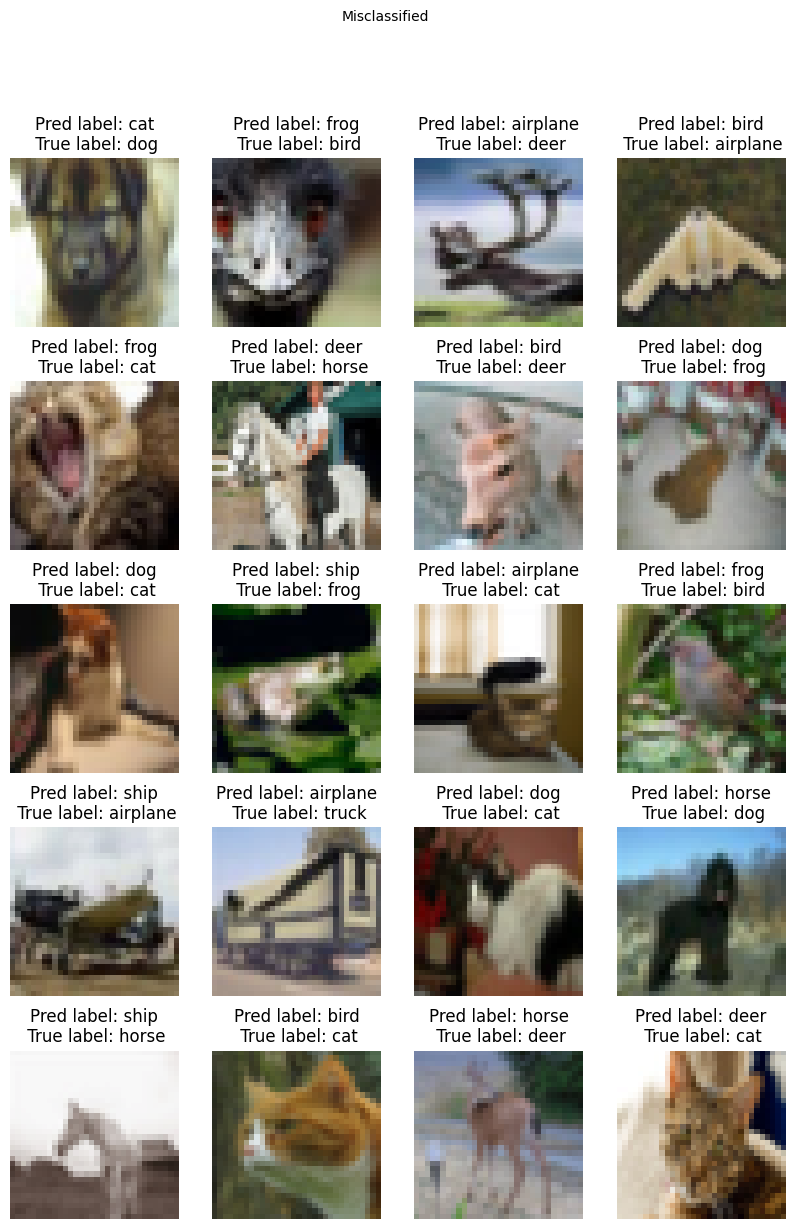

In [11]:
# from torchvision import transforms
# import matplotlib.pyplot as plt
# import numpy as np

grid_size = (4,4)
plot_misclassified(model,test_loader,test_data,device,mean,std)


Accuracy of airplane : 80 %

Accuracy of automobile : 91 %

Accuracy of  bird : 61 %

Accuracy of   cat : 39 %

Accuracy of  deer : 68 %

Accuracy of   dog : 60 %

Accuracy of  frog : 80 %

Accuracy of horse : 77 %

Accuracy of  ship : 85 %

Accuracy of truck : 75 %
{'airplane': 80.13245033112582, 'automobile': 91.30434782608695, 'bird': 61.904761904761905, 'cat': 39.285714285714285, 'deer': 68.53582554517133, 'dog': 60.063897763578275, 'frog': 80.92105263157895, 'horse': 77.88461538461539, 'ship': 85.39682539682539, 'truck': 75.625}


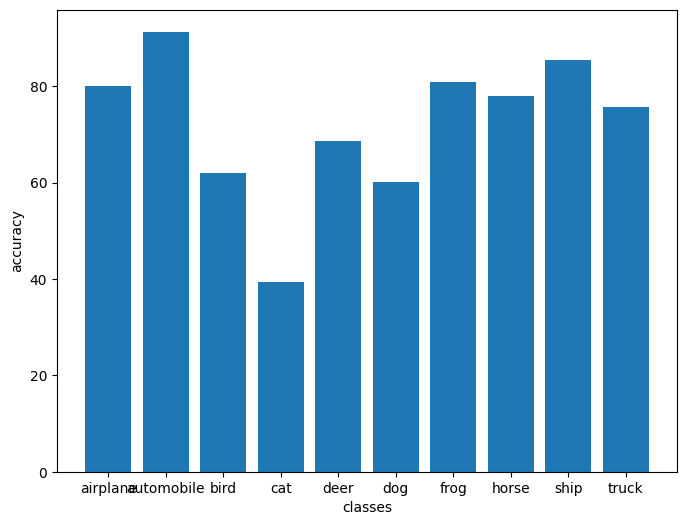

In [12]:
calculate_accuracy_per_class(model,device,test_loader,test_data)